# Лабораторная работа №5
## Методы поиска подстроки в строке
###  Задание 1
Реализовать методы поиска подстроки в строке. Добавить возможность ввода строки и подстроки с клавиатуры. Предусмотреть возможность существования пробела. Реализовать возможность выбора опции чувствительности или нечувствительности к регистру. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

Алгоритмы:

1. Кнута-Морриса-Пратта
2. Упрощенный Бойера-Мура

In [9]:
from IPython.display import HTML, display
import ipywidgets as widgets

import time

In [10]:
#Алгоритм Кнута-Морриса-Пратта
def prefix(s):
    #Префикс-функция от строки s и позиции i в ней - длина k
    #наибольшего собственного префикса подстроки s[0:i],
    #в который одновременно является суффиксом этой подстроки
    p = [0] * len(s)
    for i in range(1, len(s)):
        k = p[i - 1]
        while k > 0 and s[k] != s[i]:
            k = p[k - 1]
        if s[k] == s[i]:
            k += 1
        p[i] = k
    return p

def KMP(s, w):
    #КМП-алгоритм.
    #s: Строка, по которой будет произведен поиск
    #w: Строка, которую будем искать
    A = []
    k = 0
        
    p = prefix(s)

    for i in range(len(s)):
        while k > 0 and s[i] != w[k]:
            k = p[k-1]
        if s[i] == w[k]:
            k += 1
        if k == len(w):
            A.append((i - len(w) + 1, i+1))
            k = p[k-1]

    return A

In [11]:
#Упрощенный Бойера-Мура
def preprocess(w):
    #Строит таблицу смещений
    T = [len(w)]*256
    for i in range(len(w) - 1):
        T[ord(w[i])] = len(w) - 1 - i
    return T

def BM(s, w):
    #Алгоритм Бойера-Мура
    A = []
    T = preprocess(w)
    skip = 0
    while len(s) - skip >= len(w):
        if s[skip:skip + len(w)] == w:
            A.append((skip, skip + len(w)))
        skip += T[ord(s[skip + len(w) - 1])]
    return A

In [12]:
#Встроенный поиск
def builtin_search(s, w):
    A = []
    index = s.find(w)
    while index != -1:
        A.append((index, index + len(w)))
        index = s.find(w, index + 1)
    return A

In [13]:
#Добавить возможность ввода строки и подстроки с клавиатуры
search_string = widgets.Text(
    description='Строка',
    placeholder='Введите строку'
)
search_pattern = widgets.Text(
    description='Паттерн',
    placeholder='Введите строку'
)

ignore_case = widgets.Checkbox(
    value=False,
    description='Игнорировать регистр'
)

ignore_space = widgets.Checkbox(
    value=False,
    description='Игнорировать пробел'
)

algs = {'KMP': KMP, 'BM': BM, 'Builtin': builtin_search}
alg = widgets.Dropdown(
    options=['KMP', 'BM', 'Builtin'],
    value='KMP',
    description='Алгоритм'
)

result = widgets.HTML()

def update(c):
    if search_string.value and search_pattern.value:
        try:
            s = search_string.value
            A = search(s, search_pattern.value, algs[alg.value], ignore_case.value, ignore_space.value)
            result.value = ''
            for i, j in A:
                result.value += f'<div>{s[:i]}<b style="color: red">{s[i:j]}</b>{s[j:]}</div>'
        except Exception as e:
            result.value = str(e)

search_string.observe(update)
search_pattern.observe(update)
ignore_case.observe(update)
ignore_space.observe(update)
alg.observe(update)

update({})

widgets.VBox([
    search_string,
    search_pattern,
    alg,
    ignore_case,
    ignore_space,
    result
])

In [14]:
#Предусмотреть возможность существования пробела. 
#Реализовать возможность выбора опции чувствительности или нечувствительности к регистру.
def search(s, w, fn=KMP, ignore_case=True, ignore_space=False):
    #Поиск подстроки с возможностью игнорирования пробелов и регистра
    _s = s
    _w = w
    if ignore_case:
        _s = _s.lower()
        _w = _w.lower()
    
    if ignore_space:
        _s = _s.replace(' ', '')
        _w = _w.replace(' ', '')

    A = fn(_s, _w)

    if ignore_space:
        nonspace = 0
        kmp_without_space = 0
        index = 0
        while kmp_without_space < len(A) and index < len(s):
            if A[kmp_without_space][0] == nonspace:
                index_with_space_offsets = index
                chars_count = 0
                while chars_count < len(_w) and index_with_space_offsets < len(s):
                    if s[index_with_space_offsets] != ' ':
                        chars_count += 1
                    index_with_space_offsets += 1
                A[kmp_without_space] = (index, index_with_space_offsets)
                kmp_without_space += 1
            if s[index] != ' ': nonspace += 1
            index += 1
    
    return A

In [15]:
#Сравнение алгоритмов
import time
print("КМР")
st = time.time()
a=KMP('ABCBCBCBCBDBC','ABC')
en=time.time()
print("--- %s seconds ---" % (en-st))
print(a)
print('---------------------------------')
print("BM")
star=time.time()
b=BM('ABCBCBCBCBCBCD','BC')
end=time.time()
print("--- %s seconds ---" % (end-star))
print(b)
print("Встроенный поиск")
start=time.time()
c=builtin_search('ABCDBDBDBFBCA','DBF')
endd=time.time()
print("--- %s seconds ---" % (endd-start))
print(c)

КМР
--- 2.4080276489257812e-05 seconds ---
[(0, 3)]
---------------------------------
BM
--- 2.09808349609375e-05 seconds ---
[(1, 3), (3, 5), (5, 7), (7, 9), (9, 11), (11, 13)]
Встроенный поиск
--- 1.5020370483398438e-05 seconds ---
[(7, 10)]


### Задание 2 «Пятнашки»
Игра в 15, пятнашки, такен — популярная головоломка, придуманная в 1878 году Но ем Чепм эном. Она предст авляет собой набор одинаковых квадратных костяшек с нанесёнными числами, заключённых в квадратную коробку. Длина стороны коробки в четыре раза больше длины стороны костяшек для набора из 15 элементов, соответственно в коробке остаётся незаполненным одно квадратное поле. Цель игры — перемещая костяшки по коробке, добиться упорядочивания их по номерам, желательно сделав как можно меньше перемещений.
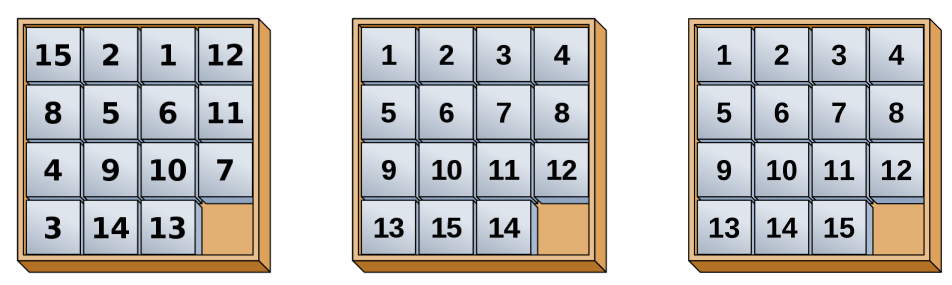
На рисунках выше изображены различные позиции элементов в задаче:

1. Левый рисунок — одна из возможных начальных позиций элементов.
2. Средний рисунок — одна из «нерешаемых» позиций.
3. Правый рисунок — позиция, где все элементы расставлены в правильном порядке.

Задача: написать программу, определяющую, является ли данное расположение «решаемым», то есть можно ли из него за конечное число шагов перейти к правильному. Если это возможно, то необходимо найти хотя бы одно решение - последовательность движений, после которой числа будут расположены в правильном порядке.

Входные данные: массив чисел, представляющий собой расстановку в порядке «слева направо, сверху вниз». Число 0 обозначает пустое поле. Например, массив [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0] представляет собой «решенную» позицию элементов.

Выходные данные: если решения нет, то функция должна вернуть пустой массив []. Если решение есть, то необходимо представить решение — для каждого шага записывается номер передвигаемого на данном шаге элемента.

Например, для начального расположения элементов [1, 2, 3, 4, 5, 6, 7, 8,
13, 9, 11, 12, 10, 14, 15, 0] одним из возможных решений будет [15, 14, 10, 13,
9, 10, 14, 15] (последовательность шагов здесь: двигаем 15, двигаем 14, двигаем 10, ..., двигаем 15).

In [16]:
from queue import PriorityQueue

N = 4

def moves(position):
    blank = position.index(0)
    i, j = divmod(blank, N)
    offsets = []
    if i > 0: offsets.append(-N)     # вниз
    if i < N - 1: offsets.append(N)  # вверх
    if j > 0: offsets.append(-1)     # вправо
    if j < N - 1: offsets.append(1)  # влево
    for offset in offsets:
        swap = blank + offset
        yield tuple(position[swap] if x==blank else position[blank] if x==swap else position[x] for x in range(N*N))


def parity(permutation):
    seen, cycles = set(), 0
    for i in permutation:
        if i not in seen:
            cycles += 1
            while i not in seen:
                seen.add(i)
                i = permutation[i]
    return (cycles + len(permutation)) % 2


class Position:
    def __init__(self, position, start_distance):
        self.position = position
        self.start_distance = start_distance

    def __lt__(self, other):
        return self.start_distance < other.start_distance

    def __str__(self):
        return '\n'.join((N*'{:3}').format(*[i%(N*N) for i in self.position[i:]]) for i in range(0, N*N, N))

SOLVED = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0)

start = [15, 2, 1, 12, 8, 5, 6, 11, 4, 9, 10, 7, 3, 14, 13, 0]

if parity(start) == 0:
    print('Нерешаемо')
else:
    start = tuple(start)

    p = Position(start, 0)

    print(p)
    print()

    candidates = PriorityQueue()
    candidates.put(p)

    visited = set([p])

    came_from = {p.position: None}
    
    while p.position != SOLVED:
        p = candidates.get()
        for k in moves(p.position):
            if k not in visited:
                candidates.put(Position(k, p.start_distance + 1))
                came_from[k] = p
                visited.add(k)

    path = []
    prev = p
    while p.position != start:
        p = came_from[p.position]
        number = p.position[prev.position.index(0)]
        path.append(number)
        prev = p
    path.reverse()

    print(path)

Нерешаемо


### Вывод
В ходе лабораторной работы мы научились искать подстроку в строке, используя алгоритм Кнута-Морриса-Пратта и упрощенный алгоритм Бойера-Мурк, а также реализовали возможность ввода строки и подстроки с клавиатуры и возможность выбора опции чувствительности или нечувствительности к регистру, предусмотрели возможность существования пробела, а также сравнили с работой встроенного поиска. Также реализовали известную игру "Пятнашки". 